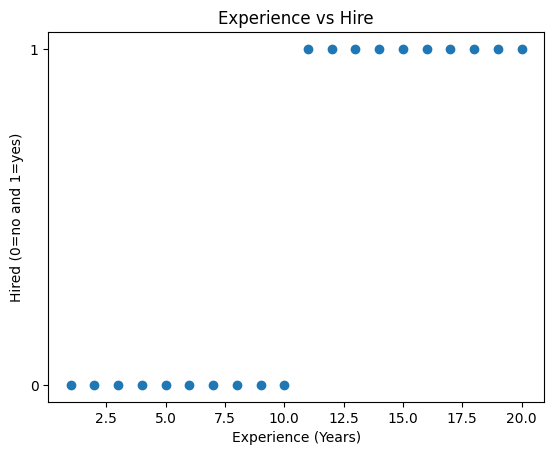

Training size:  14
Testing size:  6
Accuracy:  1.0
Confision Metrix [[4 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Probability [Not Hired, Hired]: [[0.92487402 0.07512598]]
Prediction: 0


/home/rafay/ai_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/rafay/ai_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#create classification dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
experience = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
hired = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
df = pd.DataFrame({
    "Experience": experience.flatten(),
    "Hired": hired
})
df

#Visualize the Data
plt.figure()
plt.scatter(df["Experience"], df["Hired"])
plt.xlabel("Experience (Years)")
plt.ylabel("Hired (0=no and 1=yes)")
plt.title("Experience vs Hire")
plt.yticks([0,1])
plt.show()

#Train and test split
X= df[["Experience"]]
Y= df ["Hired"]

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
print("Training size: ", len(X_train))
print("Testing size: ", len(X_test))
#train logistic regression method
model = LogisticRegression()
model.fit(X_train,Y_train)
#Make Prediction
y_pred = model.predict(X_test)
results = pd.DataFrame({
"Actual": Y_test.values,
"Predicted": y_pred
})
results


# Model Evaluation
accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy: ",accuracy)

# confision metrix
cm = confusion_matrix(Y_test,y_pred)
print("Confision Metrix", cm)

print(classification_report(Y_test,y_pred))

#Predict New Data (Real Scenario)

new_candidate = np.array([[8]])
probability = model.predict_proba(new_candidate)
prediction = model.predict(new_candidate)
print("Probability [Not Hired, Hired]:", probability)
print("Prediction:", prediction[0])